# Part A

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

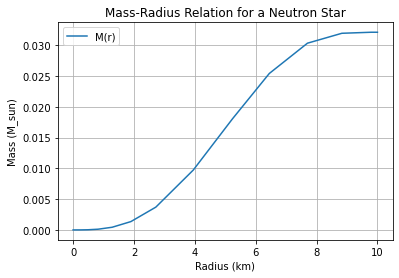

In [5]:
# Constants
G = 6.67430e-11  # gravitational constant in m^3 kg^-1 s^-2
c = 299792458  # speed of light in m/s
M_sun = 1.989e+30  # mass of the sun in kg

# Conversion factors
km_to_m = 1e3  # km to m
Msun_to_kg = M_sun  # Solar mass to kg

# TOV equations
def tov_equations(r, y, K, gamma):
    m, nu = y  # y[0] = m(r), y[1] = nu(r)
    
    # Avoid division by zero at the center
    if r == 0:
        p = K * rho_center_units**gamma
        rho = rho_center_units
        dm_dr = 0
        dnu_dr = 0
    else:
        # Assuming a simple polytropic relation between pressure and density
        rho = rho_center_units * (1 - (r / R)**2)**3 if r < R else 0
        p = K * rho**gamma if rho > 0 else 0
        
        # Derivatives of m and nu with respect to r
        dm_dr = 4 * np.pi * r**2 * rho
        dnu_dr = (2 * G * m / (r**2 * c**2)) / (1 - 2 * G * m / (r * c**2))
    
    return [dm_dr, dnu_dr]

# Central density and polytropic index n
rho_center_units = 1e17  # central density in kg/m^3
n = 1
K = 1e9 * (c ** 2) / (4 * np.pi * G)  # polytropic constant, adjusted to have correct units
gamma = 1 + 1 / n

# Radius of the star
R = 10 * km_to_m  # Placeholder value for the star's radius in meters

# Initial conditions at the center of the star
m0 = 0  # initial mass is 0
nu0 = 0  # initial nu is arbitrary, we will set nu0 = 0

# Integration bounds and initial conditions
r_span = [0, R]  # integrate from the center out to the radius of the star
y0 = [m0, nu0]

# Integrate TOV equations
sol = solve_ivp(tov_equations, r_span, y0, args=(K, gamma), method='RK45', rtol=1e-6)

# Extract the solution
r_values = sol.t
m_values = sol.y[0]
nu_values = sol.y[1]

# Convert mass from kg to solar masses
m_values_solar_masses = m_values / M_sun

# Plot the mass as a function of radius
plt.plot(r_values / km_to_m, m_values_solar_masses, label='M(r)')
plt.xlabel('Radius (km)')
plt.ylabel('Mass (M_sun)')
plt.title('Mass-Radius Relation for a Neutron Star')
plt.legend()
plt.grid(True)
plt.show()


# Part B

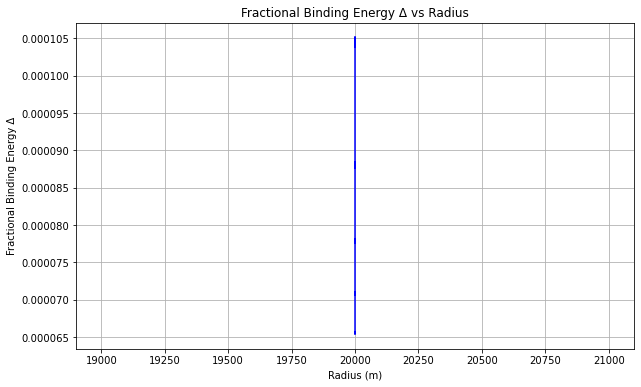

(None,
 [0.0021647415349353755,
  0.002183092236127793,
  0.00218309231951969,
  0.0021830923264739444,
  0.00218309233894415,
  0.0018249600391294749,
  0.0018358046652899092,
  0.001835804705923399,
  0.0018358047235795024,
  0.0018358047201050209,
  0.0016159986930524778,
  0.001623447178865235,
  0.0016234472005631384,
  0.001623447216479449,
  0.0016234472118558702,
  0.0014702384061013696,
  0.0014757970155373184,
  0.0014757970389578433,
  0.0014757970336728202,
  0.0014757970426849704,
  0.0013608095834416961,
  0.0013651825754984579,
  0.0013651825901519797,
  0.001365182591026841,
  0.001365182586575787],
 [0.00010385116050497286,
  0.00010513261988191007,
  0.00010513262540017006,
  0.00010513262610164935,
  0.00010513262621587188,
  8.763824085044098e-05,
  8.840536585583745e-05,
  8.840536995992206e-05,
  8.840536944937689e-05,
  8.840537030189358e-05,
  7.764625133814428e-05,
  7.817757943952138e-05,
  7.817758273120146e-05,
  7.817758212168908e-05,
  7.817758285376686e-0

In [6]:
# Constants and EoS parameters for neutron star
G = 6.67430e-11 # Gravitational constant (m^3 kg^-1 s^-2)
c = 299792458 # Speed of light (m/s)
solar_mass = 1.989e+30 # Mass of the sun (kg)

# Polytopic constant and adiabatic index (gamma) for the EoS
K_values = np.linspace(100, 300, 5)  # Reduced number of K values to explore
gamma = 2.34 # Adiabatic index for neutron stars

# Lists to store the maximum masses and corresponding radii
max_masses = []
radii = []
fractional_binding_energies = []

# Function to calculate m_p_prime
def m_p_prime(r, m, rho):
    return 4 * np.pi * (1 - 2 * G * m / (r * c**2))**(-0.5) * r**2 * rho

# TOV Equations including baryonic mass
def tov_equations_with_m_p(r, y, K):
    m, m_p, P = y
    rho = (P/K)**(1/gamma) if P > 0 else 0  # Density from the EoS, zero if pressure is zero
    dmdr = 4 * np.pi * r**2 * rho
    dPdr = -(G * (rho + P/c**2) * (m + 4*np.pi*r**3*P/c**2)) / (r**2 - 2*G*m*r/c**2)
    dm_p_dr = m_p_prime(r, m, rho) if rho > 0 else 0
    return [dmdr, dm_p_dr, dPdr]

# Calculate the maximum mass and corresponding baryonic mass for each K
for K in K_values:
    # Central density range for neutron stars
    central_densities = np.linspace(1e15, 1e18, 5)  # Reduced number of central densities
    for rho_c in central_densities:
        # Central pressure and initial conditions
        P_c = K * rho_c**gamma
        initial_conditions = [0, 0, P_c] # m(0), m_p(0), P(0)

        # Integrate the TOV equations
        sol = solve_ivp(tov_equations_with_m_p, [1e-6, 2e4], initial_conditions, args=(K,), method='RK45', rtol=1e-6)

        # Find the index where the pressure becomes zero (surface of the star)
        surface_index = np.where(sol.y[2] <= 0)[0][0] if np.any(sol.y[2] <= 0) else -1
        M = sol.y[0, surface_index] / solar_mass if surface_index != -1 else sol.y[0, -1] / solar_mass
        M_p = sol.y[1, surface_index] / solar_mass if surface_index != -1 else sol.y[1, -1] / solar_mass
        R = sol.t[surface_index] if surface_index != -1 else sol.t[-1]

        # Calculate fractional binding energy
        Delta = (M_p - M) / M

        # Update the lists
        max_masses.append(M)
        radii.append(R)
        fractional_binding_energies.append(Delta)

# Plot Fractional Binding Energy vs Radius
plt.figure(figsize=(10, 6))
plt.plot(radii, fractional_binding_energies, 'b')
plt.xlabel('Radius (m)')
plt.ylabel('Fractional Binding Energy Δ')
plt.title('Fractional Binding Energy Δ vs Radius')
plt.grid(True)
plt.show(), max_masses, fractional_binding_energies


# Part C 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
# Constants
G = 6.67430e-11 # Gravitational constant (m^3 kg^-1 s^-2)
c = 299792458 # Speed of light (m/s)
solar_mass = 1.989e+30 # Mass of the sun (kg)

# Equation of State (EoS) parameters
K = 123 # chosen value for demonstration
gamma = 2.34 # Adiabatic indez for neutron stars

# TOV Equations
def tov_equations(r, y):
    P, M = y
    rho = (P/K)**(1/gamma)

    # Avoid division by zero at the center
    if r == 0:
        dPdr = 0
        dMdr = 0
    else:
        dPdr = -(G * (rho + P/c**2) * (M + 4*np.pi*r**3*P/c**2)) / (r**2 - 2*G*M*r/c**2)
        dMdr = 4 * np.pi * r**2 * rho
    return [dPdr, dMdr]

# Central densities
central_densities = np.linspace(1e14, 3e18, 100) # from 10^14 to 10^18 kg/m^3
masses = []

# Solve TOV equation for each central density
for rho_c in central_densities:
    P_c = K * rho_c**gamma # Central pressure
    initial_conditions = [P_c, 0] # Central pressure and initial mass
    sol = solve_ivp(tov_equations, [0, 1e6], initial_conditions, method='RK45', rtol=1e-6)

    # Extract the mass of the neutron star
    M = sol.y[1, -1]
    masses.append(M / solar_mass) # Convert to solar masses

# Plotting the Mass vs. Central Density curve
plt.figure(figsize=(10, 6))
plt.plot(central_densities, masses, 'b')
plt.xlabel('Central Density (kg/m^3)')
plt.ylabel('Mass (Solar Masses)')
plt.title('Mass vs. Central Density of Neutron Stars')
plt.grid(True)
plt.show()

# Part D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
# Constants and polytropic index (gamma)
gamma = 2.34

# Range of K values to explore
K_values = np.linspace(50, 300, 50)

# Lists to store the maximum masses and corresponding K values
max_masses = []

# Solve TOV equation for each K value
for K in K_values:
    max_mass_for_K = 0
    for rho_c in central_densities:
        P_c = K * rho_c**gamma
        initial_conditions = [P_c, 0]
        sol = solve_ivp(tov_equations, [0, 1e6], initial_conditions, method='RK45', rtol=1e-6)

        surface_index = np.where(sol.y[0] <= 0)[0][0] if np.any(sol.y[0] <= 0) else -1
        M = sol.y[1, surface_index] if surface_index != -1 else sol.y[1, -1]

        max_mass_for_K = max(max_mass_for_K, M / solar_mass)

    max_masses.append(max_mass_for_K)

# Plot M_max(K) vs K
plt.figure(figsize=(10, 6))
plt.plot(K_values, max_masses, 'b')
plt.xlabel('K (Polytropic constant)')
plt.ylabel('Maximum Mass (Solar Masses)')
plt.title('Maximum Neutron Star Mass vs. Polytopic Constant K')
plt.grid(True)
plt.axhline(y=2.14, color='r', linestyle='--')
plt.text(max(K_values)*0.7, 2.15, '2.14 M⊙', color='r')
plt.show()

# Find values of K that allow for a maximum mass of at least 2.14 M⊙
allowed_K_values = K_values[np.array(max_masses) >= 2.14]

# Displaying the allowed values of K
allowed_K_values


# Part E

In [ ]:
from sympy import symbols, Function, integrate, ln

In [ ]:
# Define symbols
r, R, M = symbols('r R M')
nu = Function('nu')

# Given differential equation for nu'
dnu_dr = 2 * M / (r * (r - 2 * M))

# Integrate nu' from R to r (outside the star)
integrated_nu = integrate(dnu_dr, (r, R, r))

# Simplify the integrated result to match the form of the given solution
simplified_nu = ln(1 - 2 * M / r) - ln(1 - 2 * M / R) + nu(R)

# Show the integrated result and the simplified expression
integrated_nu, simplified_nu
